<h1>IMPORT LIBRARIES AND READ ECON CSV FILE<h1>

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
econ=pd.read_csv("Unemployment.csv")
econ.head()

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0


In [3]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316633 entries, 0 to 316632
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   FIPS_Code  316633 non-null  int64  
 1   State      316633 non-null  object 
 2   Area_Name  316633 non-null  object 
 3   Attribute  316633 non-null  object 
 4   Value      316633 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.1+ MB


In [4]:
econ=econ[econ.Attribute.isin(['Unemployment_rate_2022','Median_Household_Income_2021','Med_HH_Income_Percent_of_State_Total_2021'])]

In [5]:
econ.head()

,FIPS_Code,State,Area_Name,Attribute,Value
91,0,US,United States,Unemployment_rate_2022,3.7
92,0,US,United States,Median_Household_Income_2021,69717.0
184,1000,AL,Alabama,Unemployment_rate_2022,2.6
185,1000,AL,Alabama,Median_Household_Income_2021,53990.0
186,1000,AL,Alabama,Med_HH_Income_Percent_of_State_Total_2021,100.0


In [6]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 91 to 316632
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FIPS_Code  9660 non-null   int64  
 1   State      9660 non-null   object 
 2   Area_Name  9660 non-null   object 
 3   Attribute  9660 non-null   object 
 4   Value      9660 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 452.8+ KB


<h1>SPLIT AND MERGE ECON CSV FILE<h1>

In [7]:
mhhi=econ[econ.Attribute=='Median_Household_Income_2021']
mhhi.head()

,FIPS_Code,State,Area_Name,Attribute,Value
92,0,US,United States,Median_Household_Income_2021,69717.0
185,1000,AL,Alabama,Median_Household_Income_2021,53990.0
282,1001,AL,"Autauga County, AL",Median_Household_Income_2021,66444.0
379,1003,AL,"Baldwin County, AL",Median_Household_Income_2021,65658.0
476,1005,AL,"Barbour County, AL",Median_Household_Income_2021,38649.0


In [8]:
mhhi.rename(columns={"Value" : "Median_Household_Income_2021"},inplace=True)
mhhi.drop(columns=["Attribute"],inplace=True)

C:\Users\Jade\AppData\Local\Temp\ipykernel_14976\150605826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhhi.rename(columns={"Value" : "Median_Household_Income_2021"},inplace=True)
C:\Users\Jade\AppData\Local\Temp\ipykernel_14976\150605826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhhi.drop(columns=["Attribute"],inplace=True)


In [9]:
mhhi=mhhi.reset_index(drop=True)
mhhi.head()

,FIPS_Code,State,Area_Name,Median_Household_Income_2021
0,0,US,United States,69717.0
1,1000,AL,Alabama,53990.0
2,1001,AL,"Autauga County, AL",66444.0
3,1003,AL,"Baldwin County, AL",65658.0
4,1005,AL,"Barbour County, AL",38649.0


In [10]:
mhhi_percent=econ[econ.Attribute=='Med_HH_Income_Percent_of_State_Total_2021']
mhhi_percent.rename(columns={"Value" : "Med_HH_Income_Percent_of_State_Total_2021"},inplace=True)
mhhi_percent.drop(columns=["Attribute"],inplace=True)
mhhi_percent=mhhi_percent.reset_index(drop=True)
mhhi_percent.head()

C:\Users\Jade\AppData\Local\Temp\ipykernel_14976\1796042016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhhi_percent.rename(columns={"Value" : "Med_HH_Income_Percent_of_State_Total_2021"},inplace=True)
C:\Users\Jade\AppData\Local\Temp\ipykernel_14976\1796042016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhhi_percent.drop(columns=["Attribute"],inplace=True)


,FIPS_Code,State,Area_Name,Med_HH_Income_Percent_of_State_Total_2021
0,1000,AL,Alabama,100.0
1,1001,AL,"Autauga County, AL",123.1
2,1003,AL,"Baldwin County, AL",121.6
3,1005,AL,"Barbour County, AL",71.6
4,1007,AL,"Bibb County, AL",89.7


In [11]:
unemp_rate=econ[econ.Attribute=='Unemployment_rate_2022']
unemp_rate.rename(columns={"Value" : "Unemployment_rate_2022"},inplace=True)
unemp_rate.drop(columns=["Attribute"],inplace=True)
unemp_rate=unemp_rate.reset_index(drop=True)
unemp_rate.head()

C:\Users\Jade\AppData\Local\Temp\ipykernel_14976\4265462513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_rate.rename(columns={"Value" : "Unemployment_rate_2022"},inplace=True)
C:\Users\Jade\AppData\Local\Temp\ipykernel_14976\4265462513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_rate.drop(columns=["Attribute"],inplace=True)


,FIPS_Code,State,Area_Name,Unemployment_rate_2022
0,0,US,United States,3.7
1,1000,AL,Alabama,2.6
2,1001,AL,"Autauga County, AL",2.3
3,1003,AL,"Baldwin County, AL",2.4
4,1005,AL,"Barbour County, AL",4.1


In [12]:
print(mhhi.shape)
print(mhhi_percent.shape)
print(unemp_rate.shape)

(3194, 4)
(3193, 4)
(3273, 4)


In [13]:
mhhi_mhhi_percent=pd.merge(mhhi, mhhi_percent, on = ['FIPS_Code','State','Area_Name'], how = "outer")

In [14]:
mhhi_mhhi_percent.head()

,FIPS_Code,State,Area_Name,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,0,US,United States,69717.0,NaN
1,1000,AL,Alabama,53990.0,100.0
2,1001,AL,"Autauga County, AL",66444.0,123.1
3,1003,AL,"Baldwin County, AL",65658.0,121.6
4,1005,AL,"Barbour County, AL",38649.0,71.6


In [15]:
null_rows=mhhi_mhhi_percent[mhhi_mhhi_percent.isna().any(axis=1)]
null_rows

,FIPS_Code,State,Area_Name,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,0,US,United States,69717.0,NaN


In [16]:
econ=pd.merge_ordered(mhhi_mhhi_percent, unemp_rate, on = ['FIPS_Code','State','Area_Name'], how = "outer")

In [17]:
econ

,FIPS_Code,State,Area_Name,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021,Unemployment_rate_2022
0,0,US,United States,69717.0,NaN,3.7
1,1000,AL,Alabama,53990.0,100.0,2.6
2,1001,AL,"Autauga County, AL",66444.0,123.1,2.3
3,1003,AL,"Baldwin County, AL",65658.0,121.6,2.4
4,1005,AL,"Barbour County, AL",38649.0,71.6,4.1
...,...,...,...,...,...,...
3268,72145,PR,"Vega Baja Municipio, PR",NaN,NaN,7.4
3269,72147,PR,"Vieques Municipio, PR",NaN,NaN,6.9
3270,72149,PR,"Villalba Municipio, PR",NaN,NaN,10.4
3271,72151,PR,"Yabucoa Municipio, PR",NaN,NaN,8.3


In [18]:
null_rows=econ[econ.isna().any(axis=1)]
null_rows

,FIPS_Code,State,Area_Name,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021,Unemployment_rate_2022
0,0,US,United States,69717.0,NaN,3.7
3194,72000,PR,Puerto Rico,NaN,NaN,6.0
3195,72001,PR,"Adjuntas Municipio, PR",NaN,NaN,8.1
3196,72003,PR,"Aguada Municipio, PR",NaN,NaN,7.2
3197,72005,PR,"Aguadilla Municipio, PR",NaN,NaN,7.8
...,...,...,...,...,...,...
3268,72145,PR,"Vega Baja Municipio, PR",NaN,NaN,7.4
3269,72147,PR,"Vieques Municipio, PR",NaN,NaN,6.9
3270,72149,PR,"Villalba Municipio, PR",NaN,NaN,10.4
3271,72151,PR,"Yabucoa Municipio, PR",NaN,NaN,8.3


In [19]:
null_rows.State.value_counts()

State
PR    79
US     1
Name: count, dtype: int64

<h1>READ CLEANED SENATE CSV FILE AND ADD FEATURES<h1>

In [20]:
senate=pd.read_csv("cleaned_senate2022.csv")
senate.drop(columns=['Unnamed: 0','state_fips','totalvotes'],inplace=True)
senate.head()

,state,state_po,county_name,county_fips,candidate,party,candidatevotes
0,ALABAMA,AL,AUTAUGA,1001.0,THIRD-PARTY,OTH,567.0
1,ALABAMA,AL,AUTAUGA,1001.0,WILL BOYD,DEM,3814.0
2,ALABAMA,AL,AUTAUGA,1001.0,KATIE BRITT,REP,13359.0
3,ALABAMA,AL,BALDWIN,1003.0,THIRD-PARTY,OTH,2218.0
4,ALABAMA,AL,BALDWIN,1003.0,WILL BOYD,DEM,11478.0


In [21]:
senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5611 non-null   object 
 1   state_po        5611 non-null   object 
 2   county_name     5611 non-null   object 
 3   county_fips     5611 non-null   float64
 4   candidate       5611 non-null   object 
 5   party           5611 non-null   object 
 6   candidatevotes  5611 non-null   float64
dtypes: float64(2), object(5)
memory usage: 307.0+ KB


<h3>Feature engineering senate statewide<h3>

In [22]:
senate_statewide=pd.DataFrame({'total':senate.groupby('state').candidatevotes.sum(),
                              'dem_total':senate[senate.party=='DEM'].groupby('state').candidatevotes.sum(),
                              'rep_total':senate[senate.party=='REP'].groupby('state').candidatevotes.sum(),
                              'oth_total':senate[senate.party=='OTH'].groupby('state').candidatevotes.sum(),
                              }).reset_index()
senate_statewide[senate_statewide.isna().any(axis=1)]

,state,total,dem_total,rep_total,oth_total
3,CALIFORNIA,10843650.0,6621621.0,4222029.0,NaN
16,MISSOURI,2012511.0,868875.0,1143636.0,NaN
27,UTAH,1076061.0,NaN,571974.0,504087.0


In [23]:
senate_statewide.fillna(value=0,inplace=True)

In [24]:
senate_statewide[senate_statewide.state=='UTAH']

,state,total,dem_total,rep_total,oth_total
27,UTAH,1076061.0,0.0,571974.0,504087.0


<Axes: xlabel='state', ylabel='Votes'>

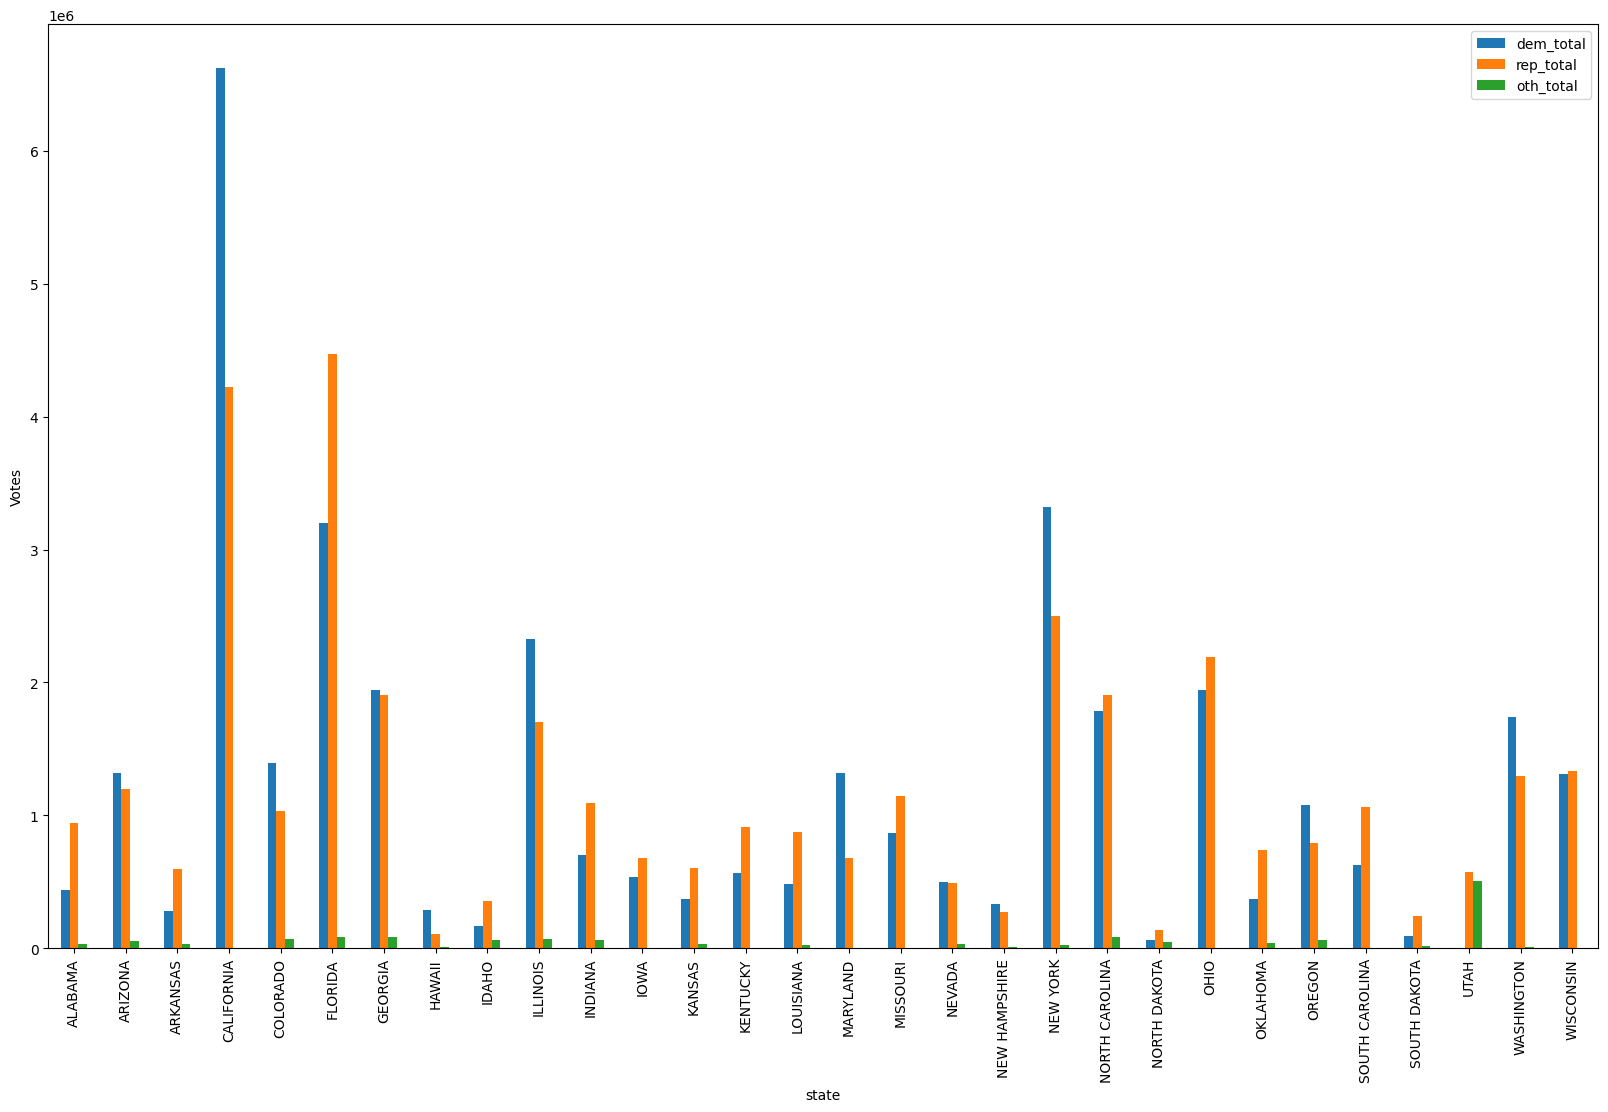

In [25]:
senate_statewide[['state','dem_total','rep_total','oth_total']].plot(kind='bar', x='state', figsize=(20,12), ylabel='Votes')

In [26]:
senate_statewide['winner']=np.greater(senate_statewide.dem_total, senate_statewide.rep_total)

In [27]:
senate_statewide.replace({True:'DEM',False:"REP"},inplace=True)

In [28]:
senate_statewide['statewide_dem/rep']=np.divide(senate_statewide.dem_total, senate_statewide.rep_total)

In [29]:
senate_statewide['statewide_dem_share']=np.divide(senate_statewide.dem_total, senate_statewide.total)
senate_statewide['statewide_rep_share']=np.divide(senate_statewide.rep_total, senate_statewide.total)
senate_statewide['statewide_oth_share']=np.divide(senate_statewide.oth_total, senate_statewide.total)

In [30]:
senate_statewide.head()

,state,total,dem_total,rep_total,oth_total,winner,statewide_dem/rep,statewide_dem_share,statewide_rep_share,statewide_oth_share
0,ALABAMA,1414238.0,436746.0,942154.0,35338.0,REP,0.463561,0.308821,0.666192,0.024987
1,ARIZONA,2572294.0,1322027.0,1196308.0,53959.0,DEM,1.105089,0.513949,0.465074,0.020977
2,ARKANSAS,901306.0,280187.0,592437.0,28682.0,REP,0.472940,0.310868,0.657310,0.031823
3,CALIFORNIA,10843650.0,6621621.0,4222029.0,0.0,DEM,1.568350,0.610645,0.389355,0.000000
4,COLORADO,2500201.0,1397170.0,1031693.0,71338.0,DEM,1.354250,0.558823,0.412644,0.028533


<Axes: xlabel='state'>

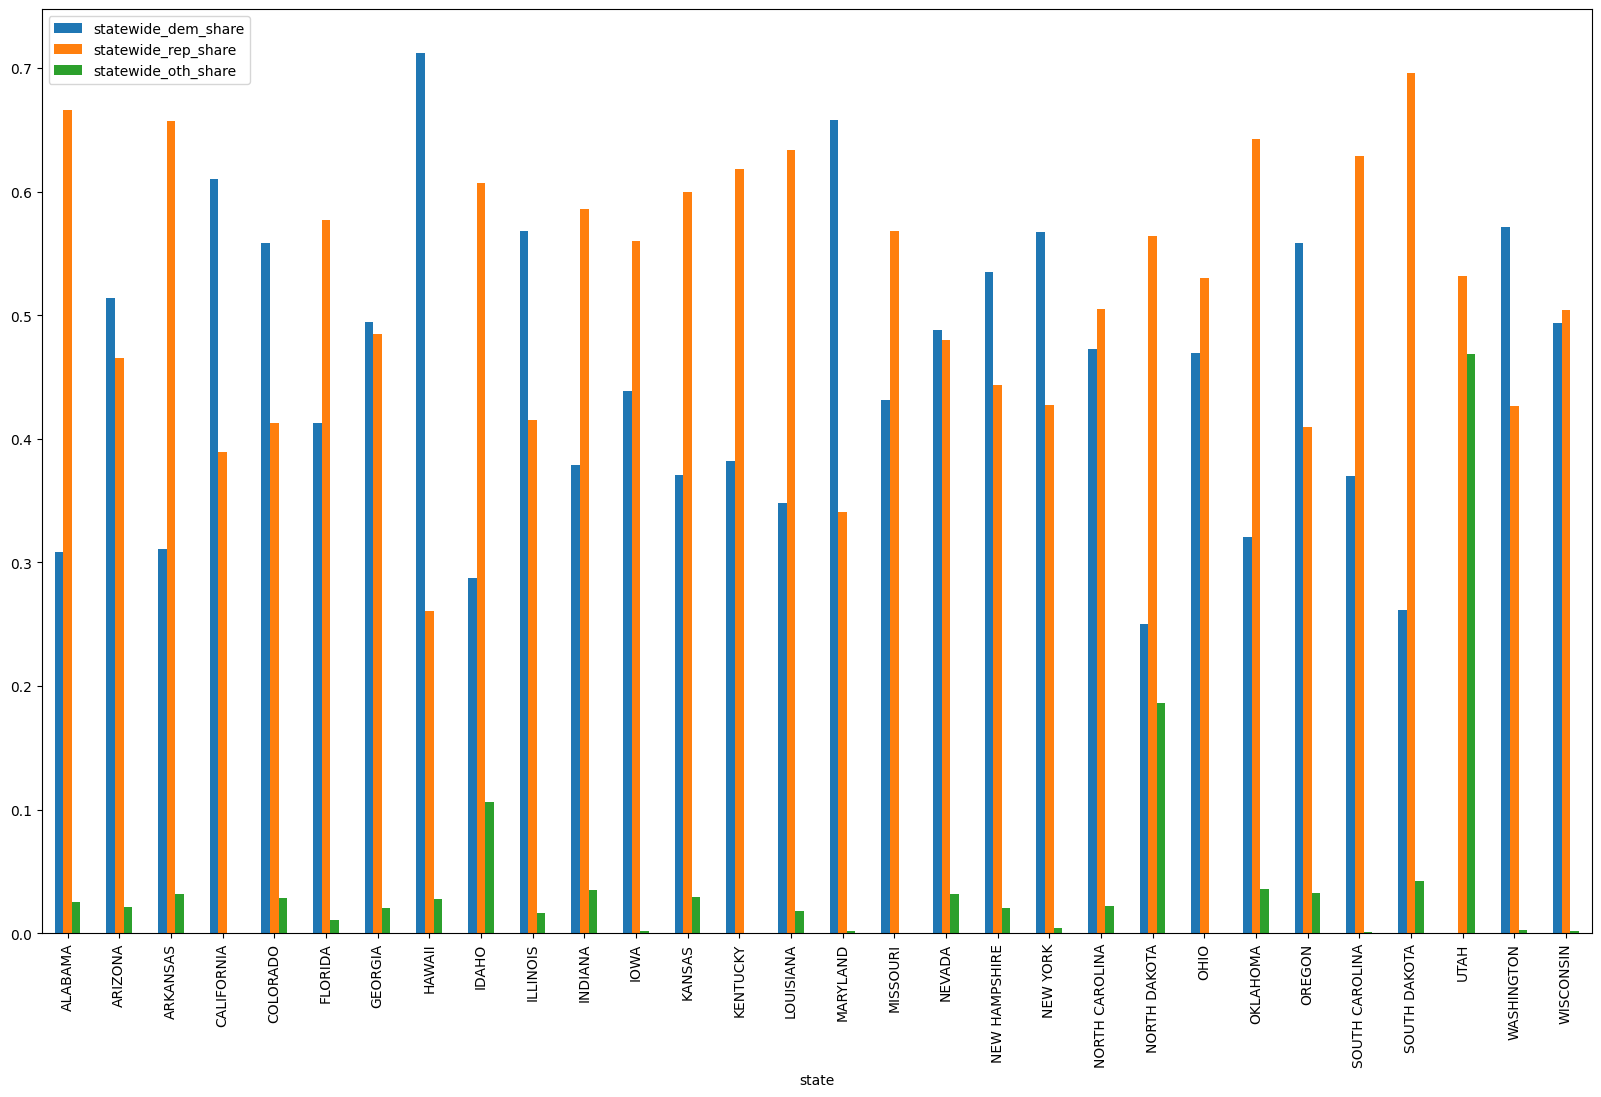

In [31]:
senate_statewide[['state','statewide_dem_share','statewide_rep_share','statewide_oth_share']].plot(kind='bar', x='state', figsize=(20,12))

<h3>Feature engineering senate countywide<h3>

In [32]:
senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5611 non-null   object 
 1   state_po        5611 non-null   object 
 2   county_name     5611 non-null   object 
 3   county_fips     5611 non-null   float64
 4   candidate       5611 non-null   object 
 5   party           5611 non-null   object 
 6   candidatevotes  5611 non-null   float64
dtypes: float64(2), object(5)
memory usage: 307.0+ KB


In [33]:
senate[senate.county_fips==17003]

,state,state_po,county_name,county_fips,candidate,party,candidatevotes
1604,ILLINOIS,IL,ALEXANDER,17003.0,THIRD-PARTY,OTH,13.0
1605,ILLINOIS,IL,ALEXANDER,17003.0,TAMMY DUCKWORTH,DEM,764.0
1606,ILLINOIS,IL,ALEXANDER,17003.0,KATHY SALVI,REP,930.0


In [34]:
senate_countywide=pd.DataFrame({'total_votes':senate.groupby(['state','state_po','county_name','county_fips']).candidatevotes.sum(),
                              'dem_votes':senate[senate.party=='DEM'].groupby(['state','state_po','county_name','county_fips']).candidatevotes.sum(),
                              'rep_votes':senate[senate.party=='REP'].groupby(['state','state_po','county_name','county_fips']).candidatevotes.sum(),
                              'oth_votes':senate[senate.party=='OTH'].groupby(['state','state_po','county_name','county_fips']).candidatevotes.sum(),
                              #'dem_name':senate[senate.party=='DEM'].groupby(['state','state_po','county_name','county_fips']).candidate.agg(pd.Series.mode)
                              'dem_name':senate[senate.party=='DEM'].groupby(['state','state_po','county_name','county_fips']).candidate.first(),
                              'rep_name':senate[senate.party=='REP'].groupby(['state','state_po','county_name','county_fips']).candidate.first(),
                              }).reset_index()
#senate_statewide[senate_statewide.isna().any(axis=1)]

In [35]:
senate_countywide[senate_countywide.county_fips==17003]

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name
554,ILLINOIS,IL,ALEXANDER,17003.0,1707.0,764.0,930.0,13.0,TAMMY DUCKWORTH,KATHY SALVI


In [36]:
senate_countywide[senate_countywide.isna().any(axis=1)].state.value_counts()

state
MISSOURI          114
KENTUCKY           73
CALIFORNIA         58
UTAH               29
WISCONSIN          12
OHIO                6
SOUTH CAROLINA      3
Name: count, dtype: int64

In [37]:
senate_countywide[senate_countywide[['dem_name','rep_name']].isna().any(axis=1)]

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name
1828,UTAH,UT,BEAVER,49001.0,2447.0,NaN,1971.0,476.0,NaN,MIKE LEE
1829,UTAH,UT,BOX ELDER,49003.0,19903.0,NaN,14434.0,5469.0,NaN,MIKE LEE
1830,UTAH,UT,CACHE,49005.0,41990.0,NaN,24588.0,17402.0,NaN,MIKE LEE
1831,UTAH,UT,CARBON,49007.0,6729.0,NaN,4265.0,2464.0,NaN,MIKE LEE
1832,UTAH,UT,DAGGETT,49009.0,498.0,NaN,377.0,121.0,NaN,MIKE LEE
1833,UTAH,UT,DAVIS,49011.0,123778.0,NaN,66385.0,57393.0,NaN,MIKE LEE
1834,UTAH,UT,DUCHESNE,49013.0,6283.0,NaN,5170.0,1113.0,NaN,MIKE LEE
1835,UTAH,UT,EMERY,49015.0,4107.0,NaN,3269.0,838.0,NaN,MIKE LEE
1836,UTAH,UT,GARFIELD,49017.0,2385.0,NaN,1795.0,590.0,NaN,MIKE LEE
1837,UTAH,UT,GRAND,49019.0,4643.0,NaN,1901.0,2742.0,NaN,MIKE LEE


In [38]:
senate_countywide.fillna(value={"dem_name" : "NO_DEM_IN_UTAH"},inplace=True)

In [39]:
senate_countywide[senate_countywide.state=='UTAH']

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name
1828,UTAH,UT,BEAVER,49001.0,2447.0,NaN,1971.0,476.0,NO_DEM_IN_UTAH,MIKE LEE
1829,UTAH,UT,BOX ELDER,49003.0,19903.0,NaN,14434.0,5469.0,NO_DEM_IN_UTAH,MIKE LEE
1830,UTAH,UT,CACHE,49005.0,41990.0,NaN,24588.0,17402.0,NO_DEM_IN_UTAH,MIKE LEE
1831,UTAH,UT,CARBON,49007.0,6729.0,NaN,4265.0,2464.0,NO_DEM_IN_UTAH,MIKE LEE
1832,UTAH,UT,DAGGETT,49009.0,498.0,NaN,377.0,121.0,NO_DEM_IN_UTAH,MIKE LEE
1833,UTAH,UT,DAVIS,49011.0,123778.0,NaN,66385.0,57393.0,NO_DEM_IN_UTAH,MIKE LEE
1834,UTAH,UT,DUCHESNE,49013.0,6283.0,NaN,5170.0,1113.0,NO_DEM_IN_UTAH,MIKE LEE
1835,UTAH,UT,EMERY,49015.0,4107.0,NaN,3269.0,838.0,NO_DEM_IN_UTAH,MIKE LEE
1836,UTAH,UT,GARFIELD,49017.0,2385.0,NaN,1795.0,590.0,NO_DEM_IN_UTAH,MIKE LEE
1837,UTAH,UT,GRAND,49019.0,4643.0,NaN,1901.0,2742.0,NO_DEM_IN_UTAH,MIKE LEE


In [40]:
senate_countywide.fillna(value=0,inplace=True)

In [41]:
senate_countywide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        1968 non-null   object 
 1   state_po     1968 non-null   object 
 2   county_name  1968 non-null   object 
 3   county_fips  1968 non-null   float64
 4   total_votes  1968 non-null   float64
 5   dem_votes    1968 non-null   float64
 6   rep_votes    1968 non-null   float64
 7   oth_votes    1968 non-null   float64
 8   dem_name     1968 non-null   object 
 9   rep_name     1968 non-null   object 
dtypes: float64(5), object(5)
memory usage: 153.9+ KB


<Axes: xlabel='county_name'>

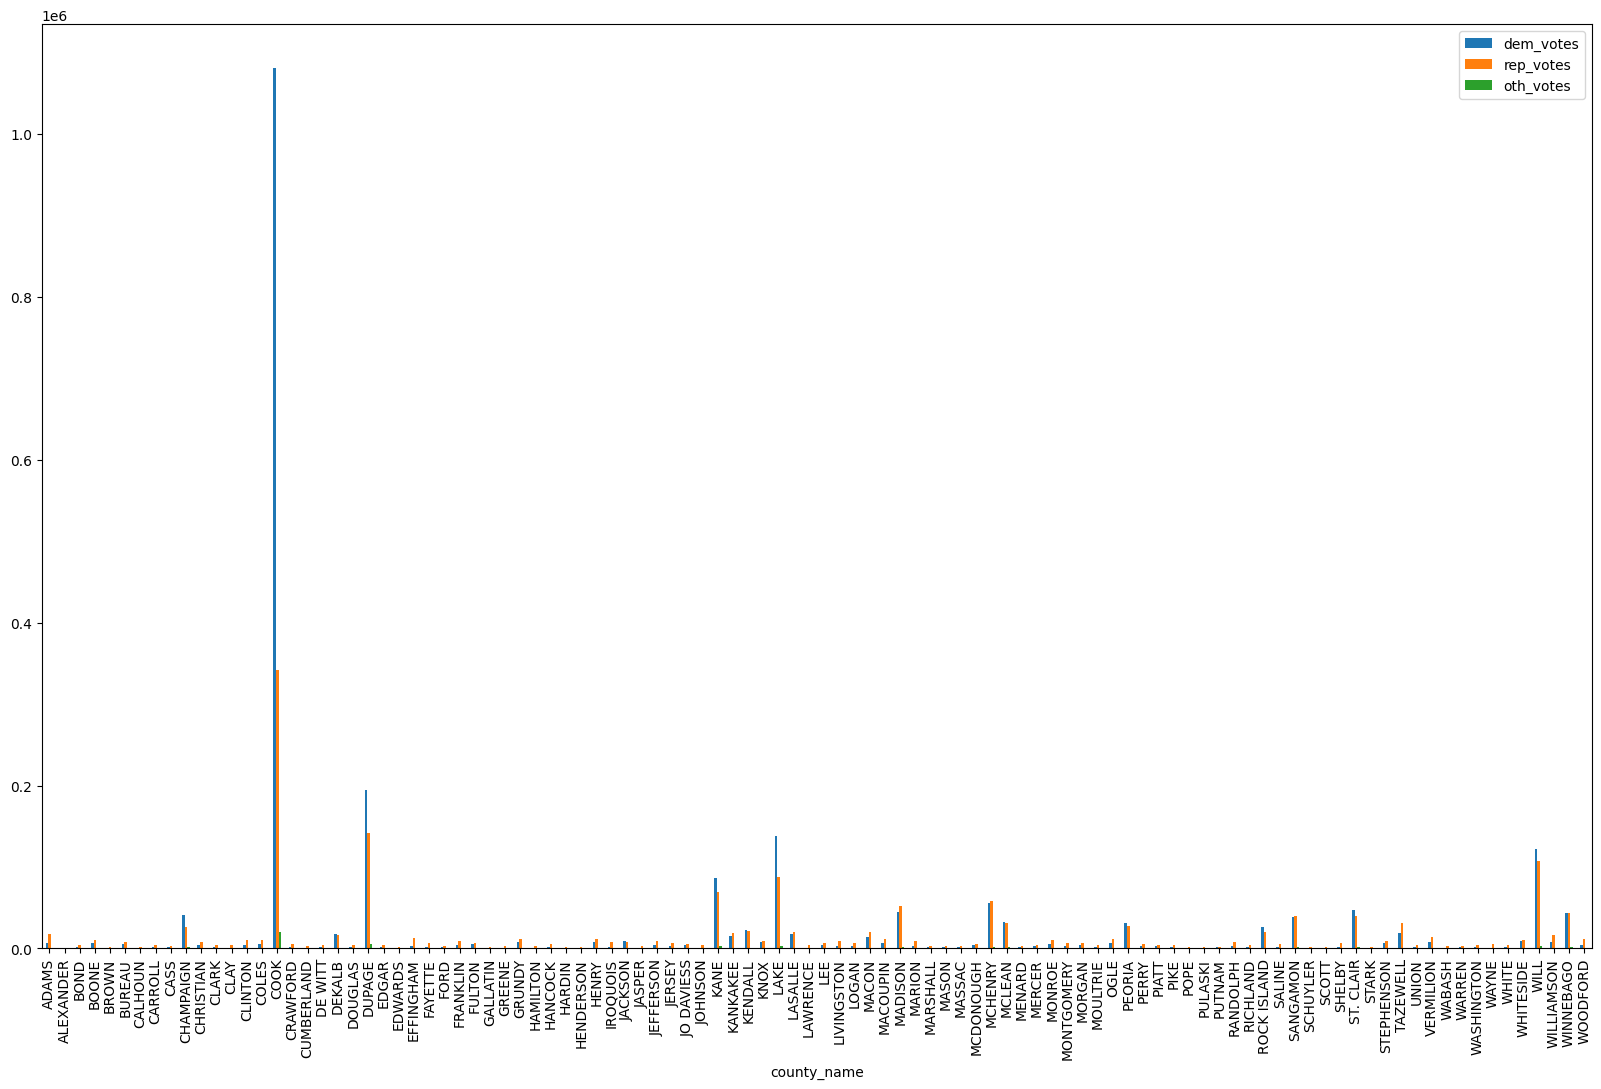

In [42]:
senate_countywide[senate_countywide.state=='ILLINOIS'].plot(kind='bar', x='county_name', y=['dem_votes','rep_votes','oth_votes'], figsize=(20,12))

<Axes: xlabel='county_name'>

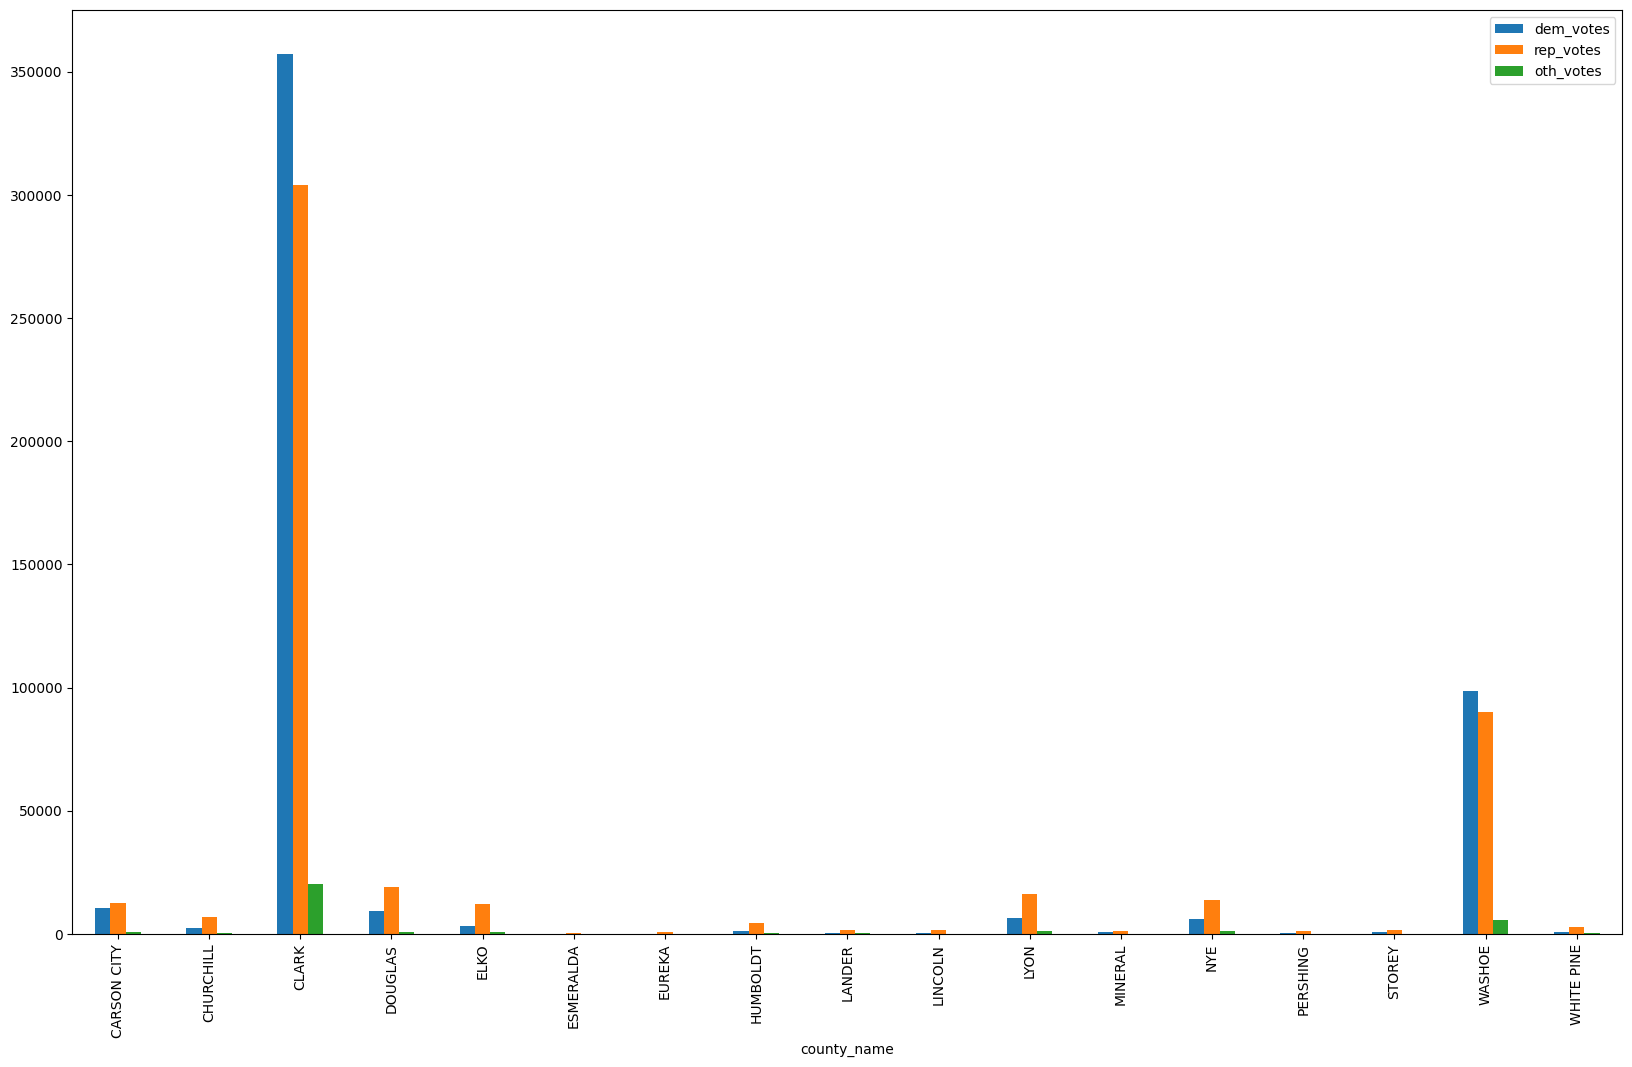

In [43]:
senate_countywide[senate_countywide.state=='NEVADA'].plot(kind='bar', x='county_name', y=['dem_votes','rep_votes','oth_votes'], figsize=(20,12))

In [44]:
senate_countywide['dem/rep']=np.divide(senate_countywide.dem_votes, senate_countywide.rep_votes)
senate_countywide['dem_share']=np.divide(senate_countywide.dem_votes, senate_countywide.total_votes)
senate_countywide['rep_share']=np.divide(senate_countywide.rep_votes, senate_countywide.total_votes)
senate_countywide['oth_share']=np.divide(senate_countywide.oth_votes, senate_countywide.total_votes)

In [45]:
senate_countywide[senate_countywide.county_fips==17003]

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name,dem/rep,dem_share,rep_share,oth_share
554,ILLINOIS,IL,ALEXANDER,17003.0,1707.0,764.0,930.0,13.0,TAMMY DUCKWORTH,KATHY SALVI,0.821505,0.447569,0.544815,0.007616


<Axes: xlabel='county_name'>

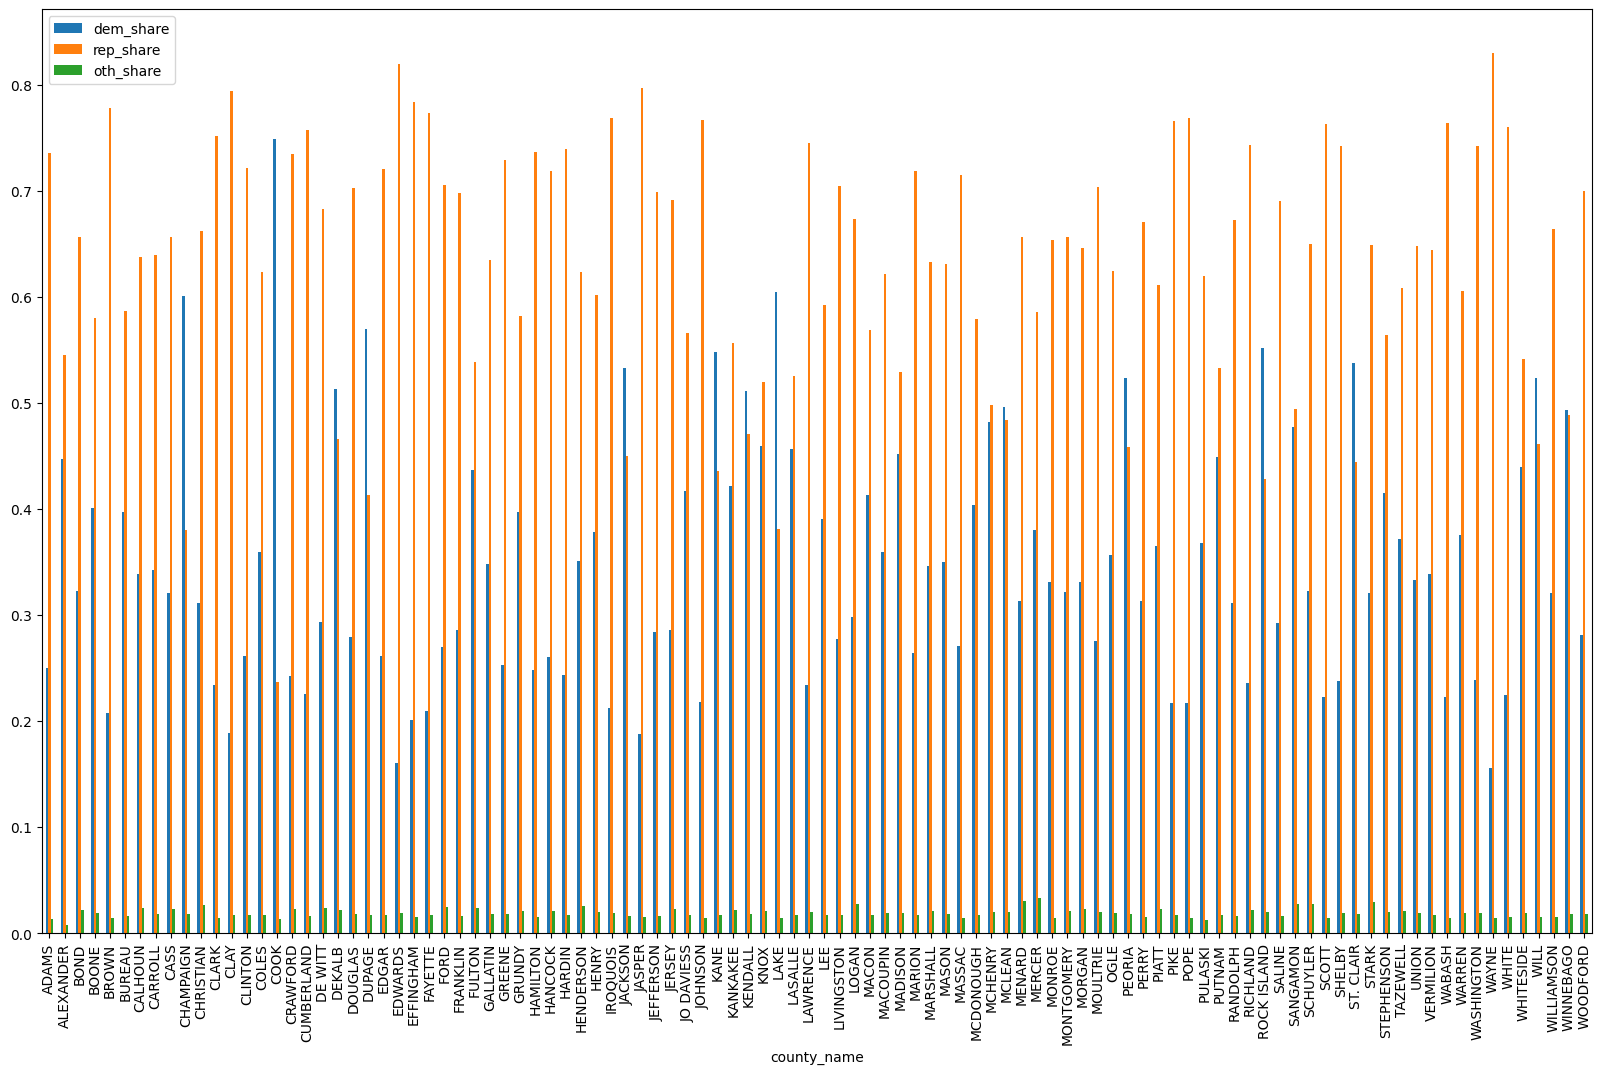

In [46]:
senate_countywide[senate_countywide.state=='ILLINOIS'].plot(kind='bar', x='county_name', y=['dem_share','rep_share','oth_share'], figsize=(20,12))

<Axes: xlabel='county_name'>

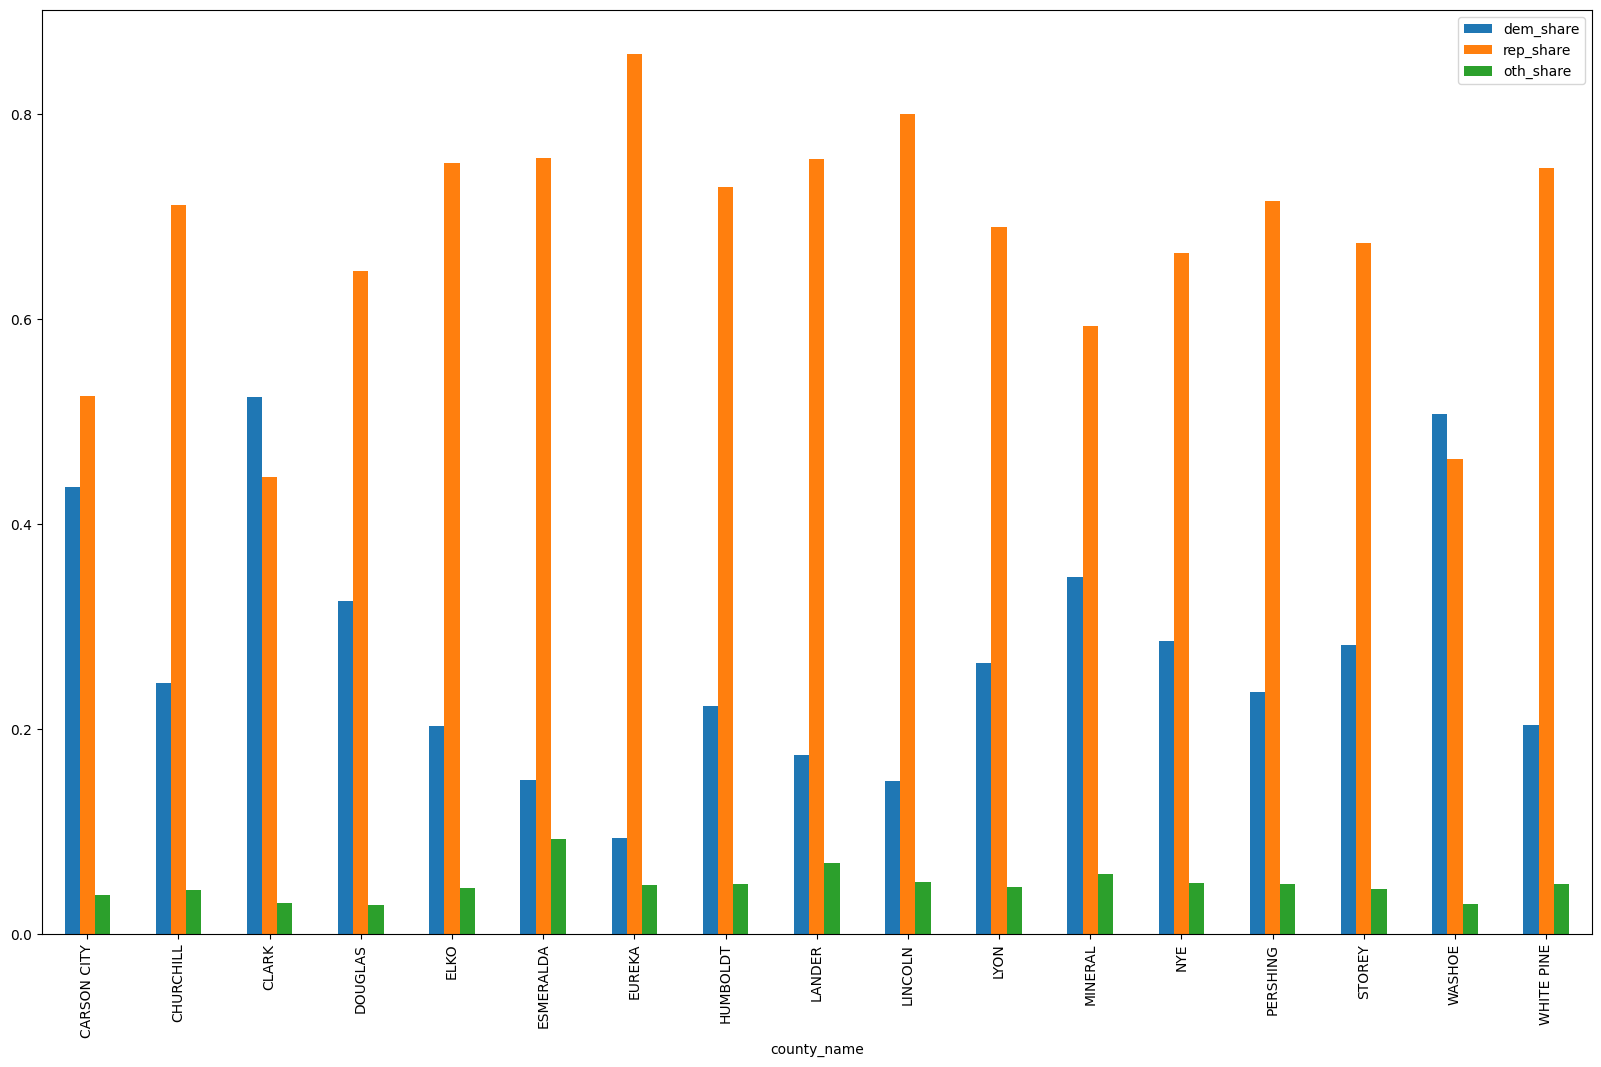

In [47]:
senate_countywide[senate_countywide.state=='NEVADA'].plot(kind='bar', x='county_name', y=['dem_share','rep_share','oth_share'], figsize=(20,12))

In [48]:
senate_countywide['county_winner']=np.equal(senate_countywide.dem_votes, senate_countywide.rep_votes)

In [49]:
senate_countywide[senate_countywide.county_winner==True]

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name,dem/rep,dem_share,rep_share,oth_share,county_winner


In [50]:
senate_countywide['county_winner']=np.greater(senate_countywide.dem_votes, senate_countywide.rep_votes)
senate_countywide.replace({True:'DEM',False:"REP"},inplace=True)

In [51]:
senate_countywide[senate_countywide.county_fips==17003]

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name,dem/rep,dem_share,rep_share,oth_share,county_winner
554,ILLINOIS,IL,ALEXANDER,17003.0,1707.0,764.0,930.0,13.0,TAMMY DUCKWORTH,KATHY SALVI,0.821505,0.447569,0.544815,0.007616,REP


In [52]:
senate_countywide.county_winner.value_counts()

county_winner
REP    1705
DEM     263
Name: count, dtype: int64

<h3>Merge senate<h3>

In [53]:
senate_statewide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                30 non-null     object 
 1   total                30 non-null     float64
 2   dem_total            30 non-null     float64
 3   rep_total            30 non-null     float64
 4   oth_total            30 non-null     float64
 5   winner               30 non-null     object 
 6   statewide_dem/rep    30 non-null     float64
 7   statewide_dem_share  30 non-null     float64
 8   statewide_rep_share  30 non-null     float64
 9   statewide_oth_share  30 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.5+ KB


In [54]:
senate_statewide.rename(columns={"total" : "statewide_total_votes",
                                 "dem_total" : "statewide_dem_votes",
                                 "rep_total" : "statewide_rep_votes",
                                 "oth_total" : "statewide_oth_votes"},inplace=True)

In [55]:
senate_statewide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  30 non-null     object 
 1   statewide_total_votes  30 non-null     float64
 2   statewide_dem_votes    30 non-null     float64
 3   statewide_rep_votes    30 non-null     float64
 4   statewide_oth_votes    30 non-null     float64
 5   winner                 30 non-null     object 
 6   statewide_dem/rep      30 non-null     float64
 7   statewide_dem_share    30 non-null     float64
 8   statewide_rep_share    30 non-null     float64
 9   statewide_oth_share    30 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.5+ KB


In [56]:
senate_countywide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          1968 non-null   object 
 1   state_po       1968 non-null   object 
 2   county_name    1968 non-null   object 
 3   county_fips    1968 non-null   float64
 4   total_votes    1968 non-null   float64
 5   dem_votes      1968 non-null   float64
 6   rep_votes      1968 non-null   float64
 7   oth_votes      1968 non-null   float64
 8   dem_name       1968 non-null   object 
 9   rep_name       1968 non-null   object 
 10  dem/rep        1968 non-null   float64
 11  dem_share      1968 non-null   float64
 12  rep_share      1968 non-null   float64
 13  oth_share      1968 non-null   float64
 14  county_winner  1968 non-null   object 
dtypes: float64(9), object(6)
memory usage: 230.8+ KB


In [57]:
senate=pd.merge_ordered(senate_countywide, senate_statewide, on = ['state'], how = "outer")

In [58]:
senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1968 non-null   object 
 1   state_po               1968 non-null   object 
 2   county_name            1968 non-null   object 
 3   county_fips            1968 non-null   float64
 4   total_votes            1968 non-null   float64
 5   dem_votes              1968 non-null   float64
 6   rep_votes              1968 non-null   float64
 7   oth_votes              1968 non-null   float64
 8   dem_name               1968 non-null   object 
 9   rep_name               1968 non-null   object 
 10  dem/rep                1968 non-null   float64
 11  dem_share              1968 non-null   float64
 12  rep_share              1968 non-null   float64
 13  oth_share              1968 non-null   float64
 14  county_winner          1968 non-null   object 
 15  stat

<h3>Add more features senate<h3>

In [59]:
senate['dem/rep_ratio_to_statewide']=np.divide(senate['dem/rep'], senate['statewide_dem/rep'])
senate['total_votes_ratio_to_statewide']=np.divide(senate.total_votes, senate.statewide_total_votes)

In [60]:
senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           1968 non-null   object 
 1   state_po                        1968 non-null   object 
 2   county_name                     1968 non-null   object 
 3   county_fips                     1968 non-null   float64
 4   total_votes                     1968 non-null   float64
 5   dem_votes                       1968 non-null   float64
 6   rep_votes                       1968 non-null   float64
 7   oth_votes                       1968 non-null   float64
 8   dem_name                        1968 non-null   object 
 9   rep_name                        1968 non-null   object 
 10  dem/rep                         1968 non-null   float64
 11  dem_share                       1968 non-null   float64
 12  rep_share                       19

In [61]:
senate[senate.isna().any(axis=1)]

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name,...,statewide_dem_votes,statewide_rep_votes,statewide_oth_votes,winner,statewide_dem/rep,statewide_dem_share,statewide_rep_share,statewide_oth_share,dem/rep_ratio_to_statewide,total_votes_ratio_to_statewide
1828,UTAH,UT,BEAVER,49001.0,2447.0,0.0,1971.0,476.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.002274
1829,UTAH,UT,BOX ELDER,49003.0,19903.0,0.0,14434.0,5469.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.018496
1830,UTAH,UT,CACHE,49005.0,41990.0,0.0,24588.0,17402.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.039022
1831,UTAH,UT,CARBON,49007.0,6729.0,0.0,4265.0,2464.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.006253
1832,UTAH,UT,DAGGETT,49009.0,498.0,0.0,377.0,121.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.000463
1833,UTAH,UT,DAVIS,49011.0,123778.0,0.0,66385.0,57393.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.115029
1834,UTAH,UT,DUCHESNE,49013.0,6283.0,0.0,5170.0,1113.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.005839
1835,UTAH,UT,EMERY,49015.0,4107.0,0.0,3269.0,838.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.003817
1836,UTAH,UT,GARFIELD,49017.0,2385.0,0.0,1795.0,590.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.002216
1837,UTAH,UT,GRAND,49019.0,4643.0,0.0,1901.0,2742.0,NO_DEM_IN_UTAH,MIKE LEE,...,0.0,571974.0,504087.0,REP,0.0,0.0,0.531544,0.468456,NaN,0.004315


In [62]:
senate.fillna(value=0,inplace=True)

In [63]:
senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           1968 non-null   object 
 1   state_po                        1968 non-null   object 
 2   county_name                     1968 non-null   object 
 3   county_fips                     1968 non-null   float64
 4   total_votes                     1968 non-null   float64
 5   dem_votes                       1968 non-null   float64
 6   rep_votes                       1968 non-null   float64
 7   oth_votes                       1968 non-null   float64
 8   dem_name                        1968 non-null   object 
 9   rep_name                        1968 non-null   object 
 10  dem/rep                         1968 non-null   float64
 11  dem_share                       1968 non-null   float64
 12  rep_share                       19

In [64]:
counties_per_state=pd.DataFrame({'counties_per_state':senate.groupby(['state']).county_name.nunique()}).reset_index()

In [65]:
counties_per_state

,state,counties_per_state
0,ALABAMA,67
1,ARIZONA,15
2,ARKANSAS,75
3,CALIFORNIA,58
4,COLORADO,64
5,FLORIDA,67
6,GEORGIA,159
7,HAWAII,4
8,IDAHO,44
9,ILLINOIS,102


In [66]:
senate=pd.merge_ordered(senate, counties_per_state, on = ['state'], how = "outer")

In [67]:
senate['county_weight']=np.multiply(senate.total_votes_ratio_to_statewide, senate.counties_per_state)

In [68]:
senate['dem_votes_ratio_to_statewide']=np.divide(senate.dem_votes, senate.statewide_dem_votes)
senate['rep_votes_ratio_to_statewide']=np.divide(senate.rep_votes, senate.statewide_rep_votes)

In [69]:
senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           1968 non-null   object 
 1   state_po                        1968 non-null   object 
 2   county_name                     1968 non-null   object 
 3   county_fips                     1968 non-null   float64
 4   total_votes                     1968 non-null   float64
 5   dem_votes                       1968 non-null   float64
 6   rep_votes                       1968 non-null   float64
 7   oth_votes                       1968 non-null   float64
 8   dem_name                        1968 non-null   object 
 9   rep_name                        1968 non-null   object 
 10  dem/rep                         1968 non-null   float64
 11  dem_share                       1968 non-null   float64
 12  rep_share                       19

In [70]:
senate.fillna(value=0,inplace=True)

In [71]:
senate['dem_county_weight']=np.multiply(senate.dem_votes_ratio_to_statewide, senate.counties_per_state)
senate['rep_county_weight']=np.multiply(senate.rep_votes_ratio_to_statewide, senate.counties_per_state)
senate['dem/rep_county_weight']=np.multiply(senate['dem/rep_ratio_to_statewide'], senate.counties_per_state)

In [73]:
senate[(senate.state=='NEVADA') & (senate.county_name=='CLARK')]

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name,...,statewide_oth_share,dem/rep_ratio_to_statewide,total_votes_ratio_to_statewide,counties_per_state,county_weight,dem_votes_ratio_to_statewide,rep_votes_ratio_to_statewide,dem_county_weight,rep_county_weight,dem/rep_county_weight
1275,NEVADA,NV,CLARK,32003.0,681798.0,357275.0,304133.0,20390.0,"CORTEZ MASTO, CATHERINE","LAXALT, ADAM PAUL",...,0.031489,1.156043,0.667873,17,11.353838,0.716965,0.620189,12.188401,10.543205,19.652735


<h1>ECON ADD FEATURE<h1>

In [74]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FIPS_Code                                  3273 non-null   int64  
 1   State                                      3273 non-null   object 
 2   Area_Name                                  3273 non-null   object 
 3   Median_Household_Income_2021               3194 non-null   float64
 4   Med_HH_Income_Percent_of_State_Total_2021  3193 non-null   float64
 5   Unemployment_rate_2022                     3273 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 153.6+ KB


In [75]:
econ.head()

,FIPS_Code,State,Area_Name,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021,Unemployment_rate_2022
0,0,US,United States,69717.0,NaN,3.7
1,1000,AL,Alabama,53990.0,100.0,2.6
2,1001,AL,"Autauga County, AL",66444.0,123.1,2.3
3,1003,AL,"Baldwin County, AL",65658.0,121.6,2.4
4,1005,AL,"Barbour County, AL",38649.0,71.6,4.1


In [76]:
#econ[np.where(str(econ.FIPS_Code)[-3:]=='000',True,False)]
statewide_econ=econ[(econ.FIPS_Code%1000==0) & (econ.FIPS_Code!=0)][['State','Unemployment_rate_2022']]

In [77]:
statewide_econ.rename(columns={"Unemployment_rate_2022" : "statewide_unemployment_rate"},inplace=True)

In [78]:
econ=pd.merge_ordered(econ, statewide_econ, on = ['State'], how = "outer")

In [79]:
econ.sort_values(by=['FIPS_Code'],inplace=True)

In [80]:
econ=econ.reset_index()
econ.drop(columns=['index'],inplace=True)
econ.head()

,FIPS_Code,State,Area_Name,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021,Unemployment_rate_2022,statewide_unemployment_rate
0,0,US,United States,69717.0,NaN,3.7,NaN
1,1000,AL,Alabama,53990.0,100.0,2.6,2.6
2,1001,AL,"Autauga County, AL",66444.0,123.1,2.3,2.6
3,1003,AL,"Baldwin County, AL",65658.0,121.6,2.4,2.6
4,1005,AL,"Barbour County, AL",38649.0,71.6,4.1,2.6


In [81]:
econ['unemployment_rate_ratio_to_statewide']=np.divide(econ.Unemployment_rate_2022, econ.statewide_unemployment_rate)

<h1>MERGE AND SAVE TO FILE<h1>

In [82]:
econ.loc[:,['Med_HH_Income_Percent_of_State_Total_2021']]/=100

In [83]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FIPS_Code                                  3273 non-null   int64  
 1   State                                      3273 non-null   object 
 2   Area_Name                                  3273 non-null   object 
 3   Median_Household_Income_2021               3194 non-null   float64
 4   Med_HH_Income_Percent_of_State_Total_2021  3193 non-null   float64
 5   Unemployment_rate_2022                     3273 non-null   float64
 6   statewide_unemployment_rate                3272 non-null   float64
 7   unemployment_rate_ratio_to_statewide       3272 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 204.7+ KB


In [84]:
econ.rename(columns={"Median_Household_Income_2021" : "median_household_income",
                     'Med_HH_Income_Percent_of_State_Total_2021':'median_household_income_ratio_to_statewide',
                     'Unemployment_rate_2022':'unemployment_rate',
                     'FIPS_Code':'fips'},inplace=True)

In [85]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips                                        3273 non-null   int64  
 1   State                                       3273 non-null   object 
 2   Area_Name                                   3273 non-null   object 
 3   median_household_income                     3194 non-null   float64
 4   median_household_income_ratio_to_statewide  3193 non-null   float64
 5   unemployment_rate                           3273 non-null   float64
 6   statewide_unemployment_rate                 3272 non-null   float64
 7   unemployment_rate_ratio_to_statewide        3272 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 204.7+ KB


In [86]:
econ[econ.fips.duplicated()]

,fips,State,Area_Name,median_household_income,median_household_income_ratio_to_statewide,unemployment_rate,statewide_unemployment_rate,unemployment_rate_ratio_to_statewide


In [87]:
senate[senate.county_fips.duplicated()]

,state,state_po,county_name,county_fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name,...,statewide_oth_share,dem/rep_ratio_to_statewide,total_votes_ratio_to_statewide,counties_per_state,county_weight,dem_votes_ratio_to_statewide,rep_votes_ratio_to_statewide,dem_county_weight,rep_county_weight,dem/rep_county_weight


In [88]:
senate.rename(columns={'county_fips':'fips'},inplace=True)

In [89]:
senate = senate.astype({"fips": np.int64})

In [90]:
senate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           1968 non-null   object 
 1   state_po                        1968 non-null   object 
 2   county_name                     1968 non-null   object 
 3   fips                            1968 non-null   int64  
 4   total_votes                     1968 non-null   float64
 5   dem_votes                       1968 non-null   float64
 6   rep_votes                       1968 non-null   float64
 7   oth_votes                       1968 non-null   float64
 8   dem_name                        1968 non-null   object 
 9   rep_name                        1968 non-null   object 
 10  dem/rep                         1968 non-null   float64
 11  dem_share                       1968 non-null   float64
 12  rep_share                       19

In [91]:
fips_codes_in_dataset=senate.fips.tolist()
econ_to_merge=econ[np.isin(econ.fips,fips_codes_in_dataset)]

In [92]:
econ_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1967 entries, 2 to 3169
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips                                        1967 non-null   int64  
 1   State                                       1967 non-null   object 
 2   Area_Name                                   1967 non-null   object 
 3   median_household_income                     1967 non-null   float64
 4   median_household_income_ratio_to_statewide  1967 non-null   float64
 5   unemployment_rate                           1967 non-null   float64
 6   statewide_unemployment_rate                 1967 non-null   float64
 7   unemployment_rate_ratio_to_statewide        1967 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 138.3+ KB


In [93]:
np.setdiff1d(fips_codes_in_dataset,econ_to_merge.fips.tolist())

array([46113])

In [94]:
senate[senate.fips==46113]

,state,state_po,county_name,fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name,...,statewide_oth_share,dem/rep_ratio_to_statewide,total_votes_ratio_to_statewide,counties_per_state,county_weight,dem_votes_ratio_to_statewide,rep_votes_ratio_to_statewide,dem_county_weight,rep_county_weight,dem/rep_county_weight
1812,SOUTH DAKOTA,SD,OGLALA LAKOTA,46113,2440.0,1889.0,422.0,129.0,BRIAN L BENGS,JOHN R THUNE,...,0.04223,11.918643,0.007011,66,0.462732,0.020757,0.001742,1.369939,0.114941,786.630417


In [95]:
econ[econ.fips==46113]

,fips,State,Area_Name,median_household_income,median_household_income_ratio_to_statewide,unemployment_rate,statewide_unemployment_rate,unemployment_rate_ratio_to_statewide


In [96]:
econ_to_merge.drop(columns=["State","Area_Name"],inplace=True)
econ_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1967 entries, 2 to 3169
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips                                        1967 non-null   int64  
 1   median_household_income                     1967 non-null   float64
 2   median_household_income_ratio_to_statewide  1967 non-null   float64
 3   unemployment_rate                           1967 non-null   float64
 4   statewide_unemployment_rate                 1967 non-null   float64
 5   unemployment_rate_ratio_to_statewide        1967 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 107.6 KB


C:\Users\Jade\AppData\Local\Temp\ipykernel_14976\1867757937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ_to_merge.drop(columns=["State","Area_Name"],inplace=True)


In [97]:
econ_to_merge.drop(columns=["statewide_unemployment_rate"],inplace=True)
dataset=pd.merge_ordered(senate, econ_to_merge, on = ['fips'], how = "outer")

C:\Users\Jade\AppData\Local\Temp\ipykernel_14976\3218690202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ_to_merge.drop(columns=["statewide_unemployment_rate"],inplace=True)


In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   state                                       1968 non-null   object 
 1   state_po                                    1968 non-null   object 
 2   county_name                                 1968 non-null   object 
 3   fips                                        1968 non-null   int64  
 4   total_votes                                 1968 non-null   float64
 5   dem_votes                                   1968 non-null   float64
 6   rep_votes                                   1968 non-null   float64
 7   oth_votes                                   1968 non-null   float64
 8   dem_name                                    1968 non-null   object 
 9   rep_name                                    1968 non-null   object 
 10  dem/rep     

In [99]:
dataset[dataset.isna().any(axis=1)]

,state,state_po,county_name,fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,rep_name,...,county_weight,dem_votes_ratio_to_statewide,rep_votes_ratio_to_statewide,dem_county_weight,rep_county_weight,dem/rep_county_weight,median_household_income,median_household_income_ratio_to_statewide,unemployment_rate,unemployment_rate_ratio_to_statewide
1817,SOUTH DAKOTA,SD,OGLALA LAKOTA,46113,2440.0,1889.0,422.0,129.0,BRIAN L BENGS,JOHN R THUNE,...,0.462732,0.020757,0.001742,1.369939,0.114941,786.630417,NaN,NaN,NaN,NaN


In [100]:
dataset.dropna(inplace=True)

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1967 entries, 0 to 1967
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   state                                       1967 non-null   object 
 1   state_po                                    1967 non-null   object 
 2   county_name                                 1967 non-null   object 
 3   fips                                        1967 non-null   int64  
 4   total_votes                                 1967 non-null   float64
 5   dem_votes                                   1967 non-null   float64
 6   rep_votes                                   1967 non-null   float64
 7   oth_votes                                   1967 non-null   float64
 8   dem_name                                    1967 non-null   object 
 9   rep_name                                    1967 non-null   object 
 10  dem/rep          

In [102]:
dataset.to_csv('senate_econ_dataset.csv')